# Imports

In [127]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.datasets import fetch_california_housing,load_iris
from sklearn.preprocessing import MultiLabelBinarizer, PowerTransformer
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.00,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.00,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16
5041,Daniel Hsia,14.00,100.00,0.00,489.00,Daniel Henney,946.00,"10,443.00",Comedy|Drama|Romance,Alan Ruck,...,9.00,English,USA,PG-13,NaN,"2,012.00",719.00,6.30,2.35,660


# Preprocessing

dropping na values for imbd_score

In [129]:
df = df.dropna(subset=['imdb_score'])

Remove the in-between imdb_score of low and high

In [130]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

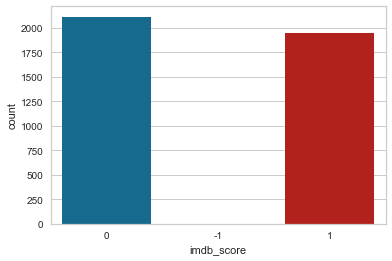

In [131]:
sns.countplot(x="imdb_score", data=df)

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

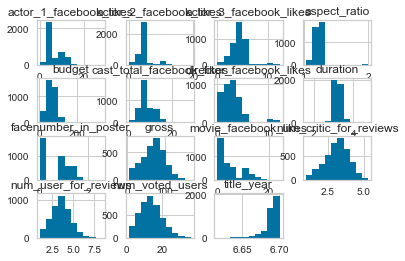

In [132]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X[list(X._get_numeric_data().columns)] = X[list(X._get_numeric_data().columns)].pow(1/4)
X.hist()

In [133]:
# mlb = MultiLabelBinarizer()
# df['genres'] =df['genres'].apply(lambda x: x.split('|'))
# df_genres = pd.DataFrame(mlb.fit_transform(df['genres']), columns="Genres_" + mlb.classes_, index=df.index)
# df = df.join(df_genres)
# df = df.drop(['genres'], axis=1)
# df

In [134]:
X = df.drop(['imdb_score'], axis=1)
y = df['imdb_score']

Train Test Split

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
3264,Michael Haneke,447.00,127.00,0.00,319.00,Emmanuelle Riva,678.00,"225,377.00",Drama|Romance,Isabelle Huppert,...,http://www.imdb.com/title/tt1602620/?ref_=fn_t...,190.00,French,France,PG-13,"8,900,000.00","2,012.00",432.00,1.85,33000
4060,David Raynr,24.00,113.00,9.00,12.00,Mikki Padilla,71.00,"19,184,015.00",Biography|Comedy|Documentary,Nancy O'Dell,...,http://www.imdb.com/title/tt0327036/?ref_=fn_t...,35.00,English,USA,R,"3,000,000.00","2,002.00",65.00,1.85,63
4982,Daniel Schechter,15.00,87.00,8.00,272.00,Kevin Corrigan,969.00,NaN,Comedy,Lena Dunham,...,http://www.imdb.com/title/tt1874789/?ref_=fn_t...,4.00,English,USA,Not Rated,NaN,"2,012.00",778.00,NaN,209
3569,Zal Batmanglij,200.00,116.00,129.00,782.00,Julia Ormond,"10,000.00","2,268,296.00",Drama|Thriller,Alexander Skarsgård,...,http://www.imdb.com/title/tt1869716/?ref_=fn_t...,119.00,English,UK,PG-13,"6,500,000.00","2,013.00",918.00,2.35,12000
2951,David Koepp,164.00,99.00,192.00,282.00,Kathryn Erbe,347.00,"21,133,087.00",Horror|Mystery|Thriller,Illeana Douglas,...,http://www.imdb.com/title/tt0164181/?ref_=fn_t...,374.00,English,USA,R,"12,000,000.00","1,999.00",301.00,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,Vic Sarin,37.00,101.00,24.00,130.00,Aidan Quinn,933.00,NaN,Drama|Family,Connie Nielsen,...,http://www.imdb.com/title/tt1014774/?ref_=fn_t...,19.00,English,Canada,PG,"6,000,000.00","2,009.00",767.00,2.35,1000
3095,Robert Iscove,96.00,95.00,7.00,"1,000.00",Clea DuVall,"23,000.00","63,319,509.00",Comedy|Romance,Paul Walker,...,http://www.imdb.com/title/tt0160862/?ref_=fn_t...,389.00,English,USA,PG-13,"10,000,000.00","1,999.00","1,000.00",1.85,0
1154,Phil Lord,375.00,109.00,97.00,839.00,Dax Flame,"17,000.00","138,447,667.00",Action|Comedy|Crime,Channing Tatum,...,http://www.imdb.com/title/tt1232829/?ref_=fn_t...,345.00,English,USA,R,"42,000,000.00","2,012.00",971.00,2.35,39000
1318,Geoffrey Sax,66.00,93.00,13.00,173.00,Sophie Okonedo,"15,000.00","652,526.00",Action|Adventure|Family|Thriller,Alex Pettyfer,...,http://www.imdb.com/title/tt0457495/?ref_=fn_t...,187.00,English,Germany,PG,"40,000,000.00","2,006.00",460.00,2.35,823


fill na values

In [136]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train_mode = X_train.select_dtypes(include='object').mode().iloc[0]
X_train = X_train.fillna(X_train_median)
X_train = X_train.fillna(X_train_mode)
X_test = X_test.fillna(X_train_median)
X_test = X_test.fillna(X_train_mode)
X_train.isna().sum() + X_test.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [137]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title",
           "language",
           "plot_keywords",
           "country",
           "genres",
]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
X_train.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [138]:
def process_content_rating(X):
  top_three = ["R","PG", "PG-13"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X_train = process_content_rating(X_train)
X_test = process_content_rating(X_test)
X_train["content_rating"]

3264     PG-13
4060         R
4982    others
3569     PG-13
2951         R
         ...  
3648        PG
3095     PG-13
1154         R
1318        PG
4713    others
Name: content_rating, Length: 3253, dtype: object

In [139]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others
3264,447.00,127.00,0.00,319.00,678.00,"225,377.00",70382,1557,1.00,190.00,"8,900,000.00","2,012.00",432.00,1.85,33000,0,1,0,0
4060,24.00,113.00,9.00,12.00,71.00,"19,184,015.00",1466,159,1.00,35.00,"3,000,000.00","2,002.00",65.00,1.85,63,0,0,1,0
4982,15.00,87.00,8.00,272.00,969.00,"24,375,436.00",760,2398,0.00,4.00,"18,263,074.00","2,012.00",778.00,2.35,209,0,0,0,1
3569,200.00,116.00,129.00,782.00,"10,000.00","2,268,296.00",41856,13180,4.00,119.00,"6,500,000.00","2,013.00",918.00,2.35,12000,0,1,0,0
2951,164.00,99.00,192.00,282.00,347.00,"21,133,087.00",62468,1254,0.00,374.00,"12,000,000.00","1,999.00",301.00,1.85,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,37.00,101.00,24.00,130.00,933.00,"24,375,436.00",1696,1940,2.00,19.00,"6,000,000.00","2,009.00",767.00,2.35,1000,1,0,0,0
3095,96.00,95.00,7.00,"1,000.00","23,000.00","63,319,509.00",67115,28734,2.00,389.00,"10,000,000.00","1,999.00","1,000.00",1.85,0,0,1,0,0
1154,375.00,109.00,97.00,839.00,"17,000.00","138,447,667.00",408302,19968,2.00,345.00,"42,000,000.00","2,012.00",971.00,2.35,39000,0,0,1,0
1318,66.00,93.00,13.00,173.00,"15,000.00","652,526.00",20201,15638,3.00,187.00,"40,000,000.00","2,006.00",460.00,2.35,823,1,0,0,0


Correlation

<AxesSubplot:>

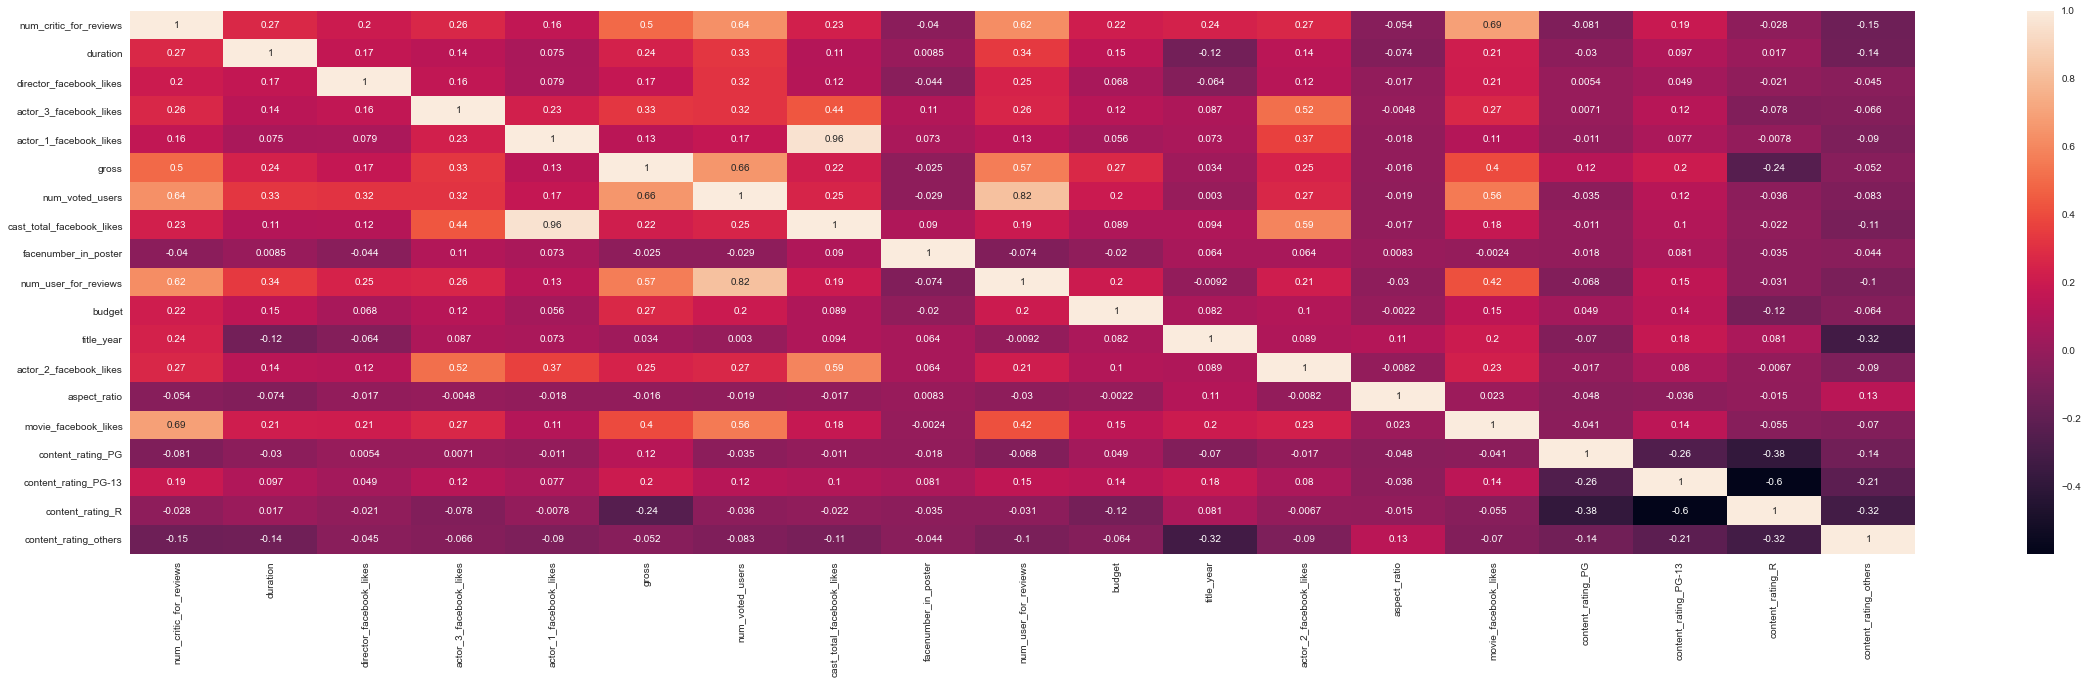

In [140]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y_train
sns.heatmap(heatmap.corr(), annot=True)

# Model

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       437
           1       0.65      0.63      0.64       377

    accuracy                           0.67       814
   macro avg       0.67      0.67      0.67       814
weighted avg       0.67      0.67      0.67       814



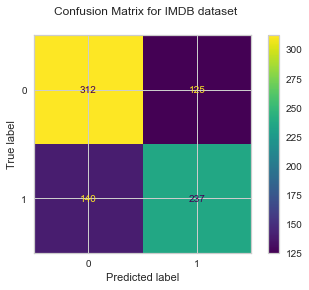

In [141]:
clf=MLPClassifier(hidden_layer_sizes=(100,50,25), activation="relu" ,solver='adam',random_state=1, max_iter=2000)
clf.fit(X_train,y_train)
y_train_pred=pd.DataFrame(clf.predict(X_train))
y_test_pred=pd.DataFrame(clf.predict(X_test))
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred))
fig=metrics.plot_confusion_matrix(clf, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix for IMDB dataset")
plt.show()

In [142]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-8-1))

mae : 0.32555282555282555
mse : 0.32555282555282555
mape : 691584709362791.1
r2 : -0.3093250945377517
Adjusted r2 : -0.3223370209430958


In [143]:
print("Train accuracy: ",clf.score(X_train,y_train))
print("Test accuracy: ",clf.score(X_test,y_test))

Train accuracy:  0.6581616968951737
Test accuracy:  0.6744471744471745
